<a href="https://colab.research.google.com/github/bigboivan/MAT422/blob/main/HW6_MAT422.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**HW 6 - Ivan Matyushov**
**MAT 422** :
For this section, we are performing maximum likelihood estimation. Here, I used max likelihood estimation to give us an estimate of the most likely mean of the amount of calories burned from the data sample of 'Health_Sleep_Stastics' obtained from: https://www.kaggle.com/datasets/hanaksoy/health-and-sleep-statistics

I inputted a red line to show the mean calculated from the dataset corresponding to the mean found from the likelihood analysis. Both corresponded well as the peak of the likeliness graph matches the calculated mean.

   User ID  Age Gender  Sleep Quality Bedtime Wake-up Time  Daily Steps  \
0        1   25      f              8   23:00        06:30         8000   
1        2   34      m              7   00:30        07:00         5000   
2        3   29      f              9   22:45        06:45         9000   
3        4   41      m              5   01:00        06:30         4000   
4        5   22      f              8   23:30        07:00        10000   

   Calories Burned Physical Activity Level Dietary Habits Sleep Disorders  \
0             2500                  medium        healthy              no   
1             2200                     low      unhealthy             yes   
2             2700                    high        healthy              no   
3             2100                     low      unhealthy             yes   
4             2800                    high         medium              no   

  Medication Usage  
0               no  
1              yes  
2               no  
3 

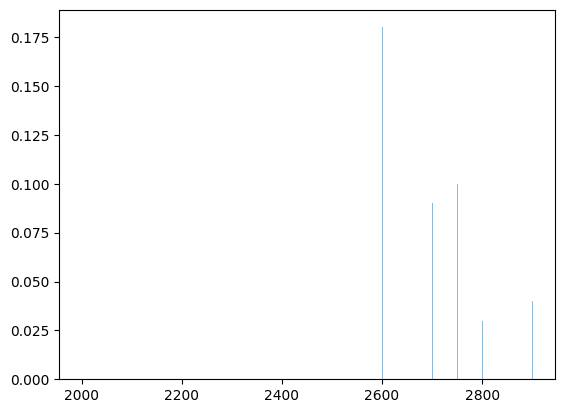

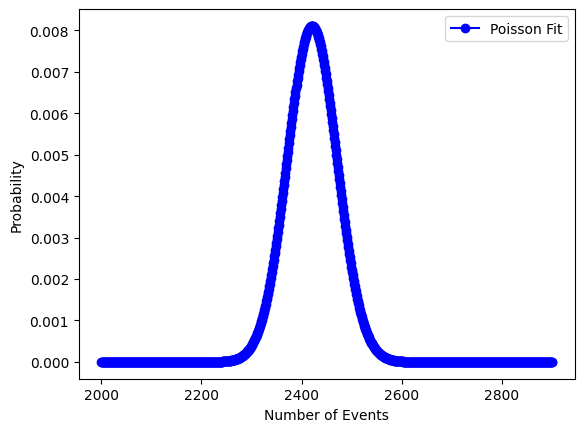

The mean calories burned is: 2421.0
The standard deviation of calories burned is: 279.6587205863604


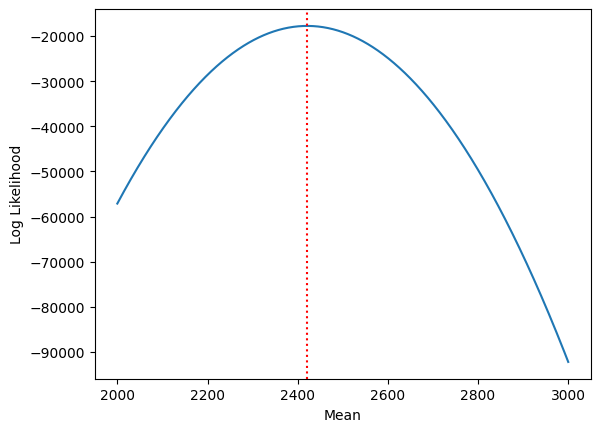

In [6]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm
from scipy.optimize import minimize

#Section 2.4.1 - Maximum Likelihood Estimation for Random Samples
df = pd.read_csv('Health_Sleep_Statistics.csv')
print(df.head())
cals = df['Calories Burned'] #Selecting calories column of dataset

def fit_poisson(cals):
    # Gives Poisson fit of data
    # Calculate the mean of the data
    mean = np.mean(cals)
    # Create a Poisson distribution object
    dist = stats.poisson(mean)
    return dist

poisson_dist = fit_poisson(cals)
x = np.arange(2000, max(cals) + 2)
pmf = poisson_dist.pmf(x)
fig = plt.figure()
plt.hist(cals, bins=x, density=True, alpha=0.5, label='Data')
fig1 = plt.figure()
plt.plot(x, pmf, 'bo-', label='Poisson Fit')
plt.xlabel('Number of Events')
plt.ylabel('Probability')
plt.legend()
plt.show()

def likelihood(params,data):
    return norm.logpdf(data,loc=params[0],scale=params[1]).sum()

x = np.linspace(2000,3000,1000)
y = [likelihood([val,15],cals) for val in x]


mean_cals = np.mean(cals)
std_cals = np.std(cals)
print("The mean calories burned is:", mean_cals)
print("The standard deviation of calories burned is:", std_cals)

fig2 = plt.figure()
plt.plot(x, y, '-', label = 'Mean Max Likelihood Estimation')
plt.xlabel('Mean')
plt.ylabel('Log Likelihood')
plt.axvline(x=mean_cals, color='r', linestyle=':')

#Section 2.4.2 - Linear Regression

Linear regression analysis is a form of Max Likelihood Estimation as the regression line is derived from minimizing the distance between all the data points as much as possible. Thus, one is getting the max liklihood best fit line for the data set.

The least squares formulation finds the squared minimum distance between the fitted line and the data points.

Here, I used linear regression of the same dataset to correlate sleep quality and steps taken along with calories burned. The linear regressions indicate that sleep quality increases with increasing calories burned and steps taken. Healthier lifestyle -> better sleep generally.

Slope: 0.006009538544157322
Intercept: -7.549092815404876
Slope: 0.0006778728705246639
Intercept: 2.3701282943165456


Text(0, 0.5, 'Sleep Quality')

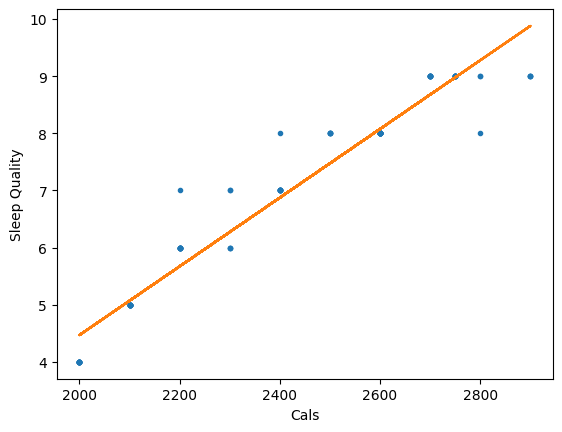

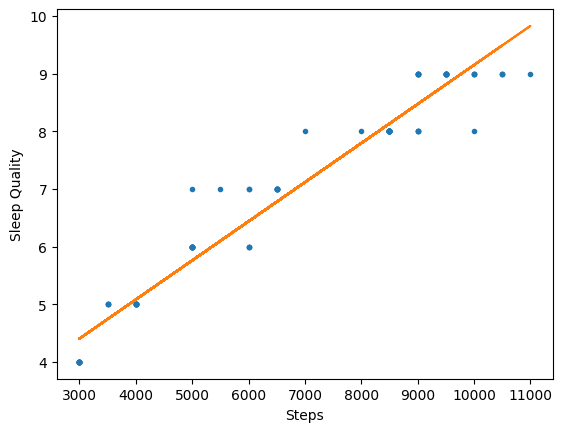

In [12]:
# 2.4.2 - Linear Regression
steps = df['Daily Steps']
qual = df['Sleep Quality']

slope, intercept, r_value, p_value, std_err = stats.linregress(cals, qual)

print("Slope:", slope)
print("Intercept:", intercept)

fig3 = plt.figure()
plt.plot(cals, qual, '.')
plt.plot(cals, slope*cals + intercept, '-')
plt.xlabel('Cals')
plt.ylabel('Sleep Quality')

slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(steps, qual)

print("Slope:", slope1)
print("Intercept:", intercept1)

fig4 = plt.figure()
plt.plot(steps, qual, '.')
plt.plot(steps, slope1*steps + intercept1, '-')
plt.xlabel('Steps')
plt.ylabel('Sleep Quality')